Running run_lasso
Running run_random_forest
Running run_neural_net
[NeuralNet] seed=0, hidden=128, dropout=0.2
Running run_nimo
[{'model': 'run_lasso', 'f1_test': 0.9162011173184358, 'precision_sup': 0.0, 'recall_sup': 0.0}, {'model': 'run_random_forest', 'f1_test': 1.0, 'precision_sup': 0.0, 'recall_sup': 0.0}, {'model': 'run_neural_net', 'f1_test': 0.9021739130434783, 'precision_sup': 0.0, 'recall_sup': 0.0}, {'model': 'run_nimo', 'f1_test': 0.9152542372881356, 'precision_sup': 0.0, 'recall_sup': 0.0}]


,f1_test,precision_sup,recall_sup
model,,,
run_lasso,0.916201,0.0,0.0
run_random_forest,1.000000,0.0,0.0
run_neural_net,0.902174,0.0,0.0
run_nimo,0.915254,0.0,0.0


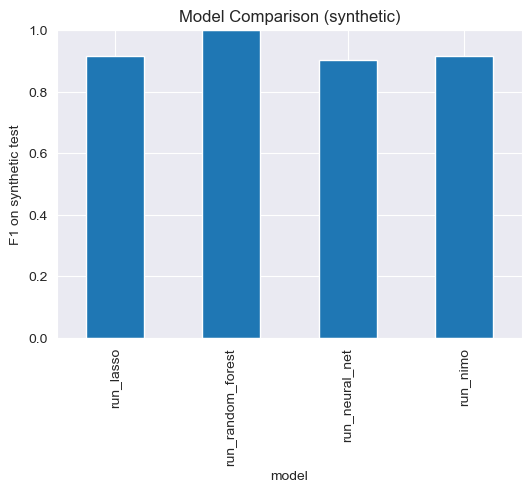

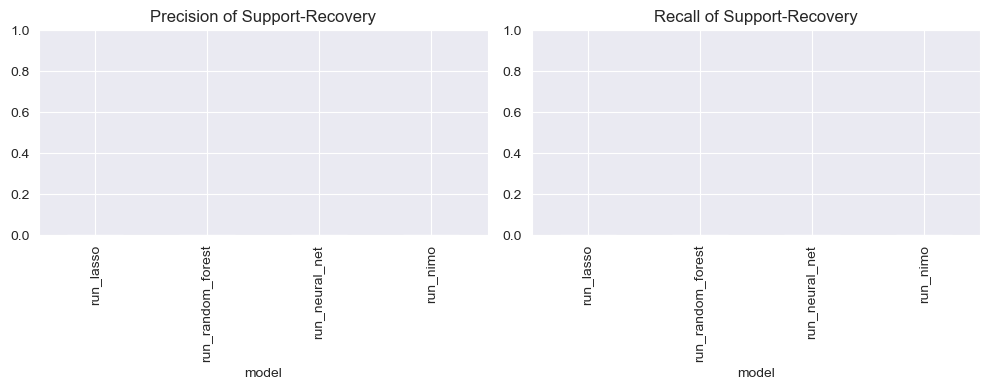

In [1]:
# Cell 1 – Imports und Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score
from methods.lasso      import run_lasso
# from methods.lasso_Net import run_lassonet   # falls gewünscht
from methods.random_forest import run_random_forest
from methods.neural_net    import run_neural_net
from methods.nimo          import run_nimo

# Cell 2 – Synthetische Daten erzeugen
np.random.seed(42)
n, d, k = 200, 20, 5
# true Support
beta_true = np.zeros(d)
support = np.random.choice(d, size=k, replace=False)
beta_true[support] = np.random.uniform(1.0, 3.0, size=k)
# Design und y
X = np.random.randn(n, d)
from scipy.special import expit
p = expit(X.dot(beta_true))
y = np.random.binomial(1, p)

# Cell 3 – Helfer zum Auswerten jeder Methode
def eval_method(fn, X_tr, y_tr, X_te, y_te, **kwargs):
    out = fn(X_tr, y_tr, X_te, y_te,
             rng=None, iteration=0, randomState=0, X_columns=list(range(d)),
             **kwargs)
    # F1 auf Test
    f1 = out['best_f1']
    # Support-Recovery
    recov = set(out['selected_features'])
    prec = precision_score((np.isin(range(d), support)).astype(int),
                           np.isin(range(d), recov).astype(int), zero_division=0)
    rec  = recall_score((np.isin(range(d), support)).astype(int),
                        np.isin(range(d), recov).astype(int), zero_division=0)
    return {'model': fn.__name__,
            'f1_test': f1,
            'precision_sup': prec,
            'recall_sup': rec}

# Cell 4 – Alle Methoden evaluieren
methods = [
    run_lasso,
    # run_lassonet,
    run_random_forest,
    run_neural_net,
    run_nimo
]
results = []
for m in methods:
    print("Running", m.__name__)
    res = eval_method(m, X, y, X, y)
    results.append(res)
df_res = pd.DataFrame(results)

print(results)

# Cell 5 – Ergebnisse anzeigen
df_res.set_index('model', inplace=True)
display(df_res)

# Cell 6 – Balkendiagramm F1-Test
plt.figure(figsize=(6,4))
df_res['f1_test'].plot.bar()
plt.ylabel("F1 on synthetic test")
plt.title("Model Comparison (synthetic)")
plt.ylim(0,1)
plt.show()

# Cell 7 – Precision / Recall Support
fig, ax = plt.subplots(1,2, figsize=(10,4))
df_res['precision_sup'].plot.bar(ax=ax[0])
ax[0].set_title("Precision of Support-Recovery")
ax[0].set_ylim(0,1)
df_res['recall_sup'].plot.bar(ax=ax[1])
ax[1].set_title("Recall of Support-Recovery")
ax[1].set_ylim(0,1)
plt.tight_layout()
plt.show()
